In [107]:
import steamapi
import time
import random
import networkx as nx
steamapi.core.APIConnection(api_key="2A526C7C2F3CEB0307B864A8DD15D320", validate_key=True)  # <-- Insert API key here
me=steamapi.user.SteamUser(userurl="m3t4lchaos")  # For http://steamcommunity.com/id/smileybarry

G=nx.Graph()
G.add_node(me.id)
n=0
visited=[]
l=[me]
user=me
t1=time.time()
pendientes=user.friends
while n<1000 and len(pendientes)>0:
    friend=pendientes.pop(0)
    visited.append(friend)
    G.add_edge(user.id,friend.id)
    try:
        if friend not in visited:
            pendientes+=friend.friends
            pendietes=list(set(pendientes))
    except steamapi.errors.APIUnauthorized:
        pass
    l.append(friend) 
    n+=1
t2=time.time()
enlapsed_time=t2-t1
print enlapsed_time

#me.level
#friend=random.choice(me.friends)
#print friend.friends

1.37400007248


In [109]:
G

** For 1000 profiles, a time of 156 seconds was needed. **

In [86]:
steamapi.core.APIConnection(api_key="2A526C7C2F3CEB0307B864A8DD15D320", validate_key=True)  # <-- Insert API key here
me=steamapi.user.SteamUser(userurl="m3t4lchaos")  # For http://steamcommunity.com/id/smileybarry
me.id

76561198067384609L

Interesting methods: .games, .privacy, .level, .groups, .friends, .recently_played, .owned_games, .playtime_forever (time in minutes), .playtime_2weeks

In [ ]:
public_friends=[i for i in user.friends if i.privacy!=1]

In [ ]:
played_games=[i for i in me.games if i.playtime_forever>60]

In [ ]:
public_friends=[i for i in user.friends if i.privacy=]
len(public_friends)

In [97]:
 # Define a function to return your friends of <Steam ID> as a list
import urllib2
import json
    
def get_friends(steam_id, key):
    request = 'https://api.steampowered.com/ISteamUser/GetFriendList/v1?steamid={steamid}&key={key}'
    r = urllib2.urlopen(request.format(key=key,steamid=steam_id))
    string = r.read().decode('utf-8')
    list_of_friends = [x['steamid'] for x in json.loads(string)['friendslist']['friends']]
    return list_of_friends


In [110]:
import json
import time
import networkx as nx
    
steam_id = '76561198067384609L'
key = '2A526C7C2F3CEB0307B864A8DD15D320' # Get at http://steamcommunity.com/dev/registerkey
    
G = nx.Graph()
nodes = [steam_id]
searched_nodes = []
requests_limit = 200 # Read limit is 200 requests per 5 minutes
count = 0
while len(nodes)>0 and count<requests_limit:
    cur_id = nodes.pop()
    if cur_id not in searched_nodes:
        G.add_node(cur_id)
        friends_list = []
            
        # Private profiles can cause exceptions
        try:
            friends_list = get_friends(cur_id, key)
        except urllib2.HTTPError:
            pass
                
        for friend in friends_list:
            nodes.append(friend)
            G.add_edge(cur_id,friend)
        count+=1
        searched_nodes.append(cur_id)
        time.sleep(1) # To be polite to Valve's servers

(-0.20000000000000001,
 1.2000000000000002,
 -0.20000000000000001,
 1.2000000000000002)

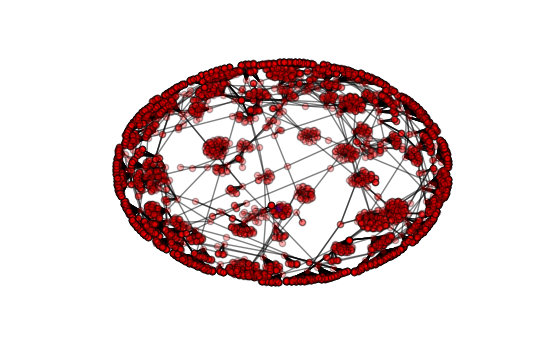

In [111]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
    
np.random.seed(51111)
    
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,
                           nodelist=[steam_id],
                           node_color='blue',
                           node_size=40,
                           alpha=1)
nx.draw_networkx_nodes(G,pos,
                           nodelist=[x for x in G.nodes() if x != steam_id],
                           node_color='r',
                           node_size=20,
                           alpha=0.3)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
plt.axis('off')

In [112]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6869
Number of edges: 7301
Average degree:   2.1258
